# Project Description

The goal is to create a web application, introducing a trading algorithm which gives a suggestion to buy, not buy, sell, or hold, and then executes that trade through user input.

Trading platform will be Alpaca. Server will be on Replit. Web App will be on Anvil. See links below.

The algorithm will look at historical stock data 1 year prior to current date. It will use the parameters which can be retrieved from Alpaca to train the model. 

The model will also include sentiment score as an independent variable, which means historical articles from each day will need to be pulled to give an average sentiment score. 

The model will be trained on the top 10 stocks in 2024 in the S&P 500 by index weight. 

The model will output a prediction for the next week. Based on its prediction, the model will suggest to buy, not buy, sell, or hold.

# Links

https://anvil.works/

https://app.alpaca.markets/paper/dashboard/overview

https://replit.com/

# Login Information

Email: nshuckerow@ucsd.edu

Password: MGTA415data!

In [114]:
import os
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import pandas as pd

# Alpaca API credentials
ALPACA_API_KEY = "PKDFQIPQCXE38TAG1WKG"
ALPACA_SECRET_KEY = "LRaWwamsMm0WDa58x8S0z8wje9gRcYhcgtMf7C55"
ALPACA_URL = 'https://paper-api.alpaca.markets'

# Initialize Alpaca API
alpaca = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, base_url=ALPACA_URL, api_version='v2')

In [115]:
def get_historical_stock_data(symbols, start_date, end_date):
    # Use the correct TimeFrame object for daily data
    timeframe = tradeapi.TimeFrame.Day
    
    all_data = []
    
    for symbol in symbols:
        bars = alpaca.get_bars(
            symbol,
            timeframe=timeframe,
            start=start_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            end=end_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            adjustment='raw',
            feed='iex'
        )
        
        data = []
        for bar in bars:
            data.append({
                'symbol': symbol,  # Add the symbol to the data
                'time': bar.t,
                'open': bar.o,
                'high': bar.h,
                'low': bar.l,
                'close': bar.c,
                'volume': bar.v
            })
        
        all_data.extend(data)
    
    return pd.DataFrame(all_data)

In [116]:
top_50_sp500_stocks = [
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corporation
    'AMZN',  # Amazon.com Inc.
    'NVDA',  # NVIDIA Corporation
    'GOOGL', # Alphabet Inc. (Class A)
    'GOOG',  # Alphabet Inc. (Class C)
    'TSLA',  # Tesla Inc.
    'META',  # Meta Platforms Inc.
    'BRK.B', # Berkshire Hathaway Inc. (Class B)
    'UNH',   # UnitedHealth Group Incorporated
    'JNJ',   # Johnson & Johnson
    'XOM',   # Exxon Mobil Corporation
    'V',     # Visa Inc.
    'PG',    # Procter & Gamble Co.
    'JPM',   # JPMorgan Chase & Co.
    'LLY',   # Eli Lilly and Company
    'MA',    # Mastercard Incorporated
    'HD',    # The Home Depot Inc.
    'CVX',   # Chevron Corporation
    'MRK',   # Merck & Co. Inc.
    'PEP',   # PepsiCo Inc.
    'ABBV',  # AbbVie Inc.
    'KO',    # The Coca-Cola Company
    'PFE',   # Pfizer Inc.
    'AVGO',  # Broadcom Inc.
    'COST',  # Costco Wholesale Corporation
    'MCD',   # McDonald's Corporation
    'TMO',   # Thermo Fisher Scientific Inc.
    'WMT',   # Walmart Inc.
    'DHR',   # Danaher Corporation
    'NKE',   # NIKE Inc.
    'DIS',   # The Walt Disney Company
    'ADBE',  # Adobe Inc.
    'NFLX',  # Netflix Inc.
    'VZ',    # Verizon Communications Inc.
    'CSCO',  # Cisco Systems Inc.
    'ABT',   # Abbott Laboratories
    'ACN',   # Accenture plc
    'NEE',   # NextEra Energy Inc.
    'LIN',   # Linde plc
    'TXN',   # Texas Instruments Incorporated
    'MDT',   # Medtronic plc
    'PM',    # Philip Morris International Inc.
    'WFC',   # Wells Fargo & Company
    'HON',   # Honeywell International Inc.
    'QCOM',  # QUALCOMM Incorporated
    'BMY',   # Bristol-Myers Squibb Company
    'LOW',   # Lowe's Companies Inc.
    'UNP',   # Union Pacific Corporation
    'RTX'    # Raytheon Technologies Corporation
]


In [117]:
# Retrieve historical stock data for the past year
end_date = datetime.utcnow()
start_date = end_date - timedelta(days=30)
historical_data = get_historical_stock_data(top_50_sp500_stocks, start_date, end_date)

print(historical_data)

     symbol                      time     open     high      low    close  \
0      AAPL 2024-07-23 00:00:00-04:00  224.365  226.925  222.680  224.920   
1      AAPL 2024-07-24 00:00:00-04:00  224.115  224.765  217.165  218.585   
2      AAPL 2024-07-25 00:00:00-04:00  218.880  220.810  214.640  217.420   
3      AAPL 2024-07-26 00:00:00-04:00  218.940  219.480  216.040  218.030   
4      AAPL 2024-07-29 00:00:00-04:00  217.375  219.280  215.790  218.185   
...     ...                       ...      ...      ...      ...      ...   
1095    RTX 2024-08-15 00:00:00-04:00  118.430  118.775  117.535  118.360   
1096    RTX 2024-08-16 00:00:00-04:00  117.930  118.410  117.575  117.960   
1097    RTX 2024-08-19 00:00:00-04:00  117.975  118.520  117.975  118.350   
1098    RTX 2024-08-20 00:00:00-04:00  118.500  118.660  117.290  117.950   
1099    RTX 2024-08-21 00:00:00-04:00  118.575  118.575  116.955  117.265   

       volume  
0      465219  
1     1005989  
2      642703  
3      6610

In [168]:
# Step 1: Convert the `time` column to a date format in the `market_df`
historical_data['date'] = pd.to_datetime(historical_data['time']).dt.date

historical_data.head()

,symbol,time,open,high,low,close,volume,date
0,AAPL,2024-07-23 00:00:00-04:00,224.365,226.925,222.680,224.920,465219,2024-07-23
1,AAPL,2024-07-24 00:00:00-04:00,224.115,224.765,217.165,218.585,1005989,2024-07-24
2,AAPL,2024-07-25 00:00:00-04:00,218.880,220.810,214.640,217.420,642703,2024-07-25
3,AAPL,2024-07-26 00:00:00-04:00,218.940,219.480,216.040,218.030,661067,2024-07-26
4,AAPL,2024-07-29 00:00:00-04:00,217.375,219.280,215.790,218.185,381966,2024-07-29


# Use Alpaca API to return News Articles

The get_news function returns articles for the specified period. The function takes in a stock symbol, the max return results, and number of days. The default number of days is 1, and default max results is 200.

In [118]:
import requests
from datetime import datetime, timedelta
import time

def get_news(symbols, days_prior=1):
    today = datetime.utcnow()
    yesterday = today - timedelta(days=days_prior)  # Adjusted to retrieve news from the previous day
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": ALPACA_API_KEY,
        "APCA-API-SECRET-KEY": ALPACA_SECRET_KEY
    }
    news = []
    page_token = None
    
    while True:
        params = {
            "symbols": ",".join(symbols),
            "start": start_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            "end": today.strftime('%Y-%m-%dT%H:%M:%SZ'),
            "limit": 50,  # Maximum allowed by the API
            "page_token": page_token  # For pagination
        }
        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()
            result = response.json()
            
            news.extend(result.get('news', []))
            
            # Get the next page token if available
            page_token = result.get('next_page_token')
            
            if not page_token:  # No more pages to fetch
                break
            
        except requests.exceptions.HTTPError as e:
            if response.status_code == 429:
                print("Rate limit reached. Sleeping for 10 seconds...")
                time.sleep(1)  # Wait for 60 seconds before retrying
            else:
                print(f"HTTP error occurred: {e}")
                break
        except Exception as e:
            print(f"An error occurred: {e}")
            break
        
    return news

# Example usage

# Retrieve news for specific symbols

news = get_news(top_50_sp500_stocks, days_prior=30)



In [145]:
news_df = pd.DataFrame(news)

# list all unique dates (not times) in news_df

unique_dates = news_df['created_at'].apply(lambda x: x.split('T')[0]).unique()

print(unique_dates)

['2024-08-21' '2024-08-20' '2024-07-19' '2024-08-19' '2024-08-18'
 '2024-08-17' '2024-08-16' '2024-08-05' '2024-08-15' '2024-08-12'
 '2024-08-14' '2024-08-09' '2024-08-13' '2024-08-03' '2024-08-11'
 '2024-08-10' '2024-07-22' '2024-08-08' '2024-08-07' '2024-08-06'
 '2024-08-02' '2024-08-04' '2024-08-01' '2024-07-31' '2024-07-30'
 '2024-06-18' '2024-07-29' '2023-12-01' '2024-07-28' '2024-07-27'
 '2024-04-29' '2024-07-26' '2024-07-24' '2024-07-25' '2024-07-23']


In [120]:
from transformers import pipeline, BertTokenizer, BertForSequenceClassification
import pandas as pd

# Load the model and tokenizer
model_name = "yiyanghkust/finbert-tone"  # Example of a financial sentiment model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/opt/conda/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [121]:
# Function to split text into 512-token chunks based on tokenization
def split_into_chunks(text, max_length=500):
    tokens = tokenizer(text, return_tensors="pt", truncation=False)['input_ids'][0]
    # Ensure each chunk is no more than 512 tokens
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]
        # Make sure the chunk is exactly 512 tokens or less
        if len(chunk) > max_length:
            chunk = chunk[:max_length]
        chunks.append(chunk)
    return chunks

In [122]:
# Function to analyze sentiment for long texts
def analyze_sentiment(text):
    chunks = split_into_chunks(text)
    sentiments = []
    for chunk in chunks:
        # Convert tokens back to text before sentiment analysis
        chunk_text = tokenizer.decode(chunk, skip_special_tokens=True)
        sentiments.append(nlp(chunk_text)[0])
    
    # Aggregate sentiment scores (e.g., by averaging)
    avg_sentiment_score = sum(s['score'] for s in sentiments) / len(sentiments)
    # Determine overall sentiment by majority vote or averaging
    positive_scores = sum(s['score'] for s in sentiments if s['label'] == 'positive')
    negative_scores = sum(s['score'] for s in sentiments if s['label'] == 'negative')
    sentiment_label = 'positive' if positive_scores >= negative_scores else 'negative'
    
    return sentiment_label, avg_sentiment_score

In [163]:
# Function to calculate the overall sentiment score
def calculate_overall_sentiment(row):
    content_label, content_score = analyze_sentiment(row['summary'])
    headline_label, headline_score = analyze_sentiment(row['headline'])
    
    # Average the sentiment scores of content and headline
    overall_score = (content_score + headline_score) / 2
    overall_label = 'positive' if (content_score + headline_score) >= 1 else 'negative'
    
    return overall_label, overall_score

In [146]:
# Apply the overall sentiment analysis function to your DataFrame
news_df['sentiment'], news_df['sentiment_score'] = zip(*news_df['headline'].apply(analyze_sentiment))

In [147]:
news_df.head()

,author,content,created_at,headline,id,images,source,summary,symbols,updated_at,url,sentiment,sentiment_score
0,Natan Ponieman,,2024-08-21T20:22:29Z,Is The Consumer OK? What We Know From Retailer...,40494701,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Today&#39;s consumer is &#34;willing to shop w...,"[HD, M, ROST, TGT, TJX, VCR, WMT, XLY]",2024-08-21T21:17:55Z,https://www.benzinga.com/news/24/08/40494701/i...,positive,0.997878
1,Chris Katje,,2024-08-21T20:45:24Z,Jeff Bezos 'Has No Plans' To Buy NBA's Boston ...,40495264,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Jeff Bezos was linked to buying the NBA&#39;s ...,[AMZN],2024-08-21T21:15:41Z,https://www.benzinga.com/m-a/24/08/40495264/je...,positive,0.999194
2,Benzinga Newsdesk,,2024-08-21T20:23:58Z,The Walt Disney Company Board Names James P. G...,40494750,[],benzinga,,[DIS],2024-08-21T20:23:59Z,https://www.benzinga.com/news/24/08/40494750/t...,positive,0.999994
3,Benzinga Newsdesk,,2024-08-21T20:14:11Z,Microsoft Sees Q1 Intelligent Cloud Revenue $2...,40494339,[],benzinga,,[MSFT],2024-08-21T20:14:12Z,https://www.benzinga.com/news/24/08/40494339/m...,positive,0.998954
4,Benzinga Insights,,2024-08-21T19:46:02Z,Bristol-Myers Squibb's Options Frenzy: What Yo...,40493645,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,,[BMY],2024-08-21T19:46:03Z,https://www.benzinga.com/insights/options/24/0...,positive,0.997554


Need to group by symbol and date now that there are multiple symbols. 

In [150]:
news_copy = news_df.copy()

In [151]:
news_copy.head()

,author,content,created_at,headline,id,images,source,summary,symbols,updated_at,url,sentiment,sentiment_score
0,Natan Ponieman,,2024-08-21T20:22:29Z,Is The Consumer OK? What We Know From Retailer...,40494701,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Today&#39;s consumer is &#34;willing to shop w...,"[HD, M, ROST, TGT, TJX, VCR, WMT, XLY]",2024-08-21T21:17:55Z,https://www.benzinga.com/news/24/08/40494701/i...,positive,0.997878
1,Chris Katje,,2024-08-21T20:45:24Z,Jeff Bezos 'Has No Plans' To Buy NBA's Boston ...,40495264,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Jeff Bezos was linked to buying the NBA&#39;s ...,[AMZN],2024-08-21T21:15:41Z,https://www.benzinga.com/m-a/24/08/40495264/je...,positive,0.999194
2,Benzinga Newsdesk,,2024-08-21T20:23:58Z,The Walt Disney Company Board Names James P. G...,40494750,[],benzinga,,[DIS],2024-08-21T20:23:59Z,https://www.benzinga.com/news/24/08/40494750/t...,positive,0.999994
3,Benzinga Newsdesk,,2024-08-21T20:14:11Z,Microsoft Sees Q1 Intelligent Cloud Revenue $2...,40494339,[],benzinga,,[MSFT],2024-08-21T20:14:12Z,https://www.benzinga.com/news/24/08/40494339/m...,positive,0.998954
4,Benzinga Insights,,2024-08-21T19:46:02Z,Bristol-Myers Squibb's Options Frenzy: What Yo...,40493645,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,,[BMY],2024-08-21T19:46:03Z,https://www.benzinga.com/insights/options/24/0...,positive,0.997554


In [154]:
import pandas as pd

# Assume your DataFrame is named `news_df`

# Step 1: Convert 'created_at' column to datetime format
news_copy['created_at'] = pd.to_datetime(news_copy['created_at'])

# Step 2: Extract the date (without the time) from the 'created_at' column
news_copy['date'] = news_copy['created_at'].dt.date

# Step 3: Explode the 'symbols' column directly since it's already a list
news_copy = news_copy.explode('symbols')

# Step 4: Group by the extracted date and symbol, and calculate the average sentiment score
daily_sentiment = news_copy.groupby(['date', 'symbols'])['sentiment_score'].mean().reset_index()

# Step 5: Rename the columns for clarity
daily_sentiment.columns = ['date', 'symbol', 'average_sentiment_score']

# Display the result
print(daily_sentiment)


            date symbol  average_sentiment_score
0     2023-12-01   TSLA                 0.999948
1     2024-04-29   TSLA                 0.961141
2     2024-06-18   NVDA                 0.510231
3     2024-07-19   AAPL                 0.999999
4     2024-07-22   TSLA                 0.999939
...          ...    ...                      ...
4440  2024-08-21   XPEV                 0.999760
4441  2024-08-21     ZK                 0.999760
4442  2024-08-21     ZM                 0.997179
4443  2024-08-21    ZTO                 0.999994
4444  2024-08-21    ZUO                 0.999994

[4445 rows x 3 columns]


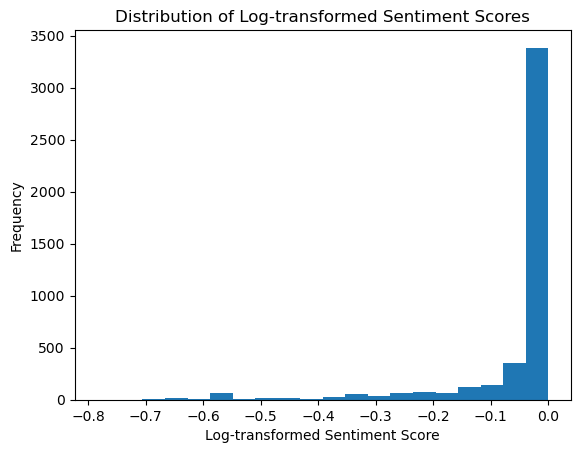

In [162]:
# display a bar chart showing distribution of sentiment scores. first log transform the data. dont group by symbol. show the score range and frequency

import matplotlib.pyplot as plt
import numpy
import math

# Log-transform the sentiment scores
daily_sentiment['log_sentiment_score'] = daily_sentiment['average_sentiment_score'].apply(lambda x: math.log(x))

# Plot the distribution of log-transformed sentiment scores
plt.hist(daily_sentiment['log_sentiment_score'], bins=20)
plt.xlabel('Log-transformed Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Log-transformed Sentiment Scores')
plt.show()

This is where we would discuss how we would use various sources to get a variety of data. Getting news from only one source will be bias. And in this case, we are only getting news from Alpaca and the majority of the headlines are extremely positive. Right

In [172]:
stock_data_merged = pd.merge(historical_data, daily_sentiment, how='left', on=['date', 'symbol'])

# save to csv named stock_data.csv

stock_data_merged.to_csv('stock_data.csv', index=False)

In [198]:
type(stock_data_merged['date'][0])

datetime.date

In [202]:
# Function to load the most recent date from the CSV file
def load_last_update_date(file_path="stock_data.csv"):
    try:
        df = pd.read_csv(file_path)

        # Ensure that the 'date' column is converted to datetime, coercing errors
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

        # Drop rows where 'date' couldn't be converted to datetime (i.e., NaT)
        df = df.dropna(subset=['date'])

        # Find the most recent date
        most_recent_date = df['date'].max()

        return most_recent_date
    except (FileNotFoundError, IndexError, KeyError):
        return None

In [179]:
last = load_last_update_date()

In [191]:
# Function to save the current date as the last update date
def save_last_update_date(date, file_path="stock_data.csv"):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df.loc[df['date'].idxmax(), 'date'] = date
    df.to_csv(file_path, index=False)

In [187]:
# Function to get news from the Alpaca API
def get_new_news(symbols, start_date, end_date):
    url = "https://data.alpaca.markets/v1beta1/news"
    headers = {
        "APCA-API-KEY-ID": ALPACA_API_KEY,
        "APCA-API-SECRET-KEY": ALPACA_SECRET_KEY
    }
    news = []
    page_token = None
    
    while True:
        params = {
            "symbols": ",".join(symbols),
            "start": start_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            "end": end_date.strftime('%Y-%m-%dT%H:%M:%SZ'),
            "limit": 50,
            "page_token": page_token
        }
        try:
            response = requests.get(url, headers=headers, params=params)
            response.raise_for_status()
            result = response.json()
            
            news.extend(result.get('news', []))
            
            page_token = result.get('next_page_token')
            if not page_token:
                break
            
        except requests.exceptions.HTTPError as e:
            if response.status_code == 429:
                print("Rate limit reached. Sleeping for 10 seconds...")
                time.sleep(10)
            else:
                print(f"HTTP error occurred: {e}")
                break
        except Exception as e:
            print(f"An error occurred: {e}")
            break
        
    return news

In [203]:
# Combined function to update stock data with new news and sentiment analysis
def update_stock_data(symbols, file_path="stock_data.csv"):
    # Load the last update date
    last_update = load_last_update_date(file_path)
    if last_update is None:
        last_update = datetime.utcnow() - timedelta(days=30)  # Default to last 30 days
    else:
        last_update = pd.to_datetime(last_update) + timedelta(days=1)  # Start from the next day after the last update
    
    # Get the current date
    today = datetime.utcnow()
    
    # Retrieve news from Alpaca
    new_news = get_new_news(symbols, last_update, today)
    
    # Convert new news data to DataFrame
    new_news_df = pd.DataFrame(new_news)
    
    # Perform sentiment analysis on new articles
    new_news_df['sentiment'], new_news_df['sentiment_score'] = zip(*new_news_df['headline'].apply(analyze_sentiment))
    
    # Load existing stock data
    try:
        news_df = pd.read_csv(file_path)
    except FileNotFoundError:
        news_df = pd.DataFrame()
    
    # Combine the new news with the existing data
    news_df = pd.concat([news_df, new_news_df], ignore_index=True)
    
    # Save the updated DataFrame
    news_df.to_csv(file_path, index=False)
    
    # Save the most recent update date
    save_last_update_date(today, file_path)

In [204]:
update_stock_data(top_50_sp500_stocks)